Quiz 18 Age/Net Worth Regression in sklearn

Fred Net worth prediction:  [[ 186.32625273]]
r-squared score: 0.874588235822
scope: [[ 6.47354955]]
intercept [-14.35378331]


/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


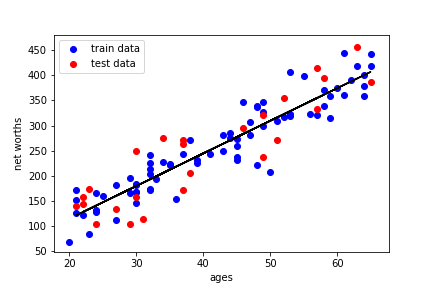

In [2]:
import sys
sys.path.append("../")
import lessonUtils as utils
import random
import numpy

utils.matplotlib.use('agg')

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test


def studentReg(ages_train, net_worths_train):    
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    reg = reg.fit(ages_train, net_worths_train)
    
    print "Fred Net worth prediction: ", reg.predict([31])
    print "r-squared score:" , reg.score(ages_train, net_worths_train)
    print "slope:", reg.coef_
    print "intercept", reg.intercept_
    
    return reg

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()
reg = studentReg(ages_train, net_worths_train)

plt = utils.matplotlib.pyplot

plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")


plt.savefig("test.png")




utils.Image(filename = "test.png")


Mini Project

Fred bonus prediction:  [ 115565.06825834]
r-squared score: -1.48499241737
slope: [ 5.44814029]
intercept -102360.543294


/Users/cinq/Documents/Programs/anaconda/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


slope test: [ 2.27410114]


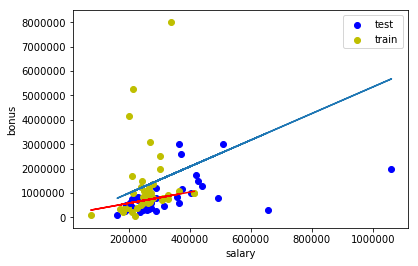

In [3]:

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).
    Draws a little scatterplot of the training/testing data
    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
#features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "y"
test_color = "b"

from sklearn import linear_model
regMini = linear_model.LinearRegression()
regMini = regMini.fit(feature_train, target_train)

print "Fred bonus prediction: ", regMini.predict([40000])
print "r-squared score:" , regMini.score(feature_test, target_test)
print "slope:", regMini.coef_
print "intercept", regMini.intercept_

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, regMini.predict(feature_test) )
   # plt.plot( feature_train, regMini.predict(feature_train) )
except NameError:
    pass

regMini.fit(feature_test, target_test)

print "slope test:", regMini.coef_

plt.plot(feature_train, regMini.predict(feature_train), color="r") 

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()